### Chapter 1 - Approaching Almost Any ML Problem

### TSNE Decomposition with 2 components to check if it yield good results on SKIKITLEARN MNIST Data ( Digit Recognition )

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn import manifold

In [4]:
data = datasets.fetch_openml('mnist_784',version=1,return_X_y=True)

In [6]:
pixel_val,targets = data
targets = targets.astype(int)

In [21]:
pixel_val.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


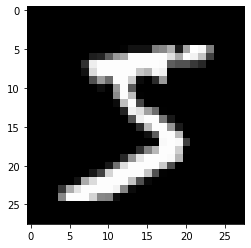

In [27]:
single_image = pixel_val.iloc[0].values.reshape(28,28)
plt.imshow(single_image,cmap='gray')

In [38]:
tsne = manifold.TSNE(n_components=3, random_state=42)
transformed_data = tsne.fit_transform(pixel_val.iloc[:3000,:])

In [39]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data,targets.iloc[:3000])),columns=['x','y','z','target'])

In [40]:
tsne_df['target'] = tsne_df['target'].astype(int)

In [41]:
tsne_df.head()

,x,y,z,target
0,-2.965519,-8.377883,5.903883,5
1,-18.962337,-7.103731,9.377201,0
2,-9.149877,-6.322237,-13.220972,4
3,18.912327,6.941484,1.853606,1
4,-1.006106,0.610420,-6.948870,9


/Users/shankarmanoharan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


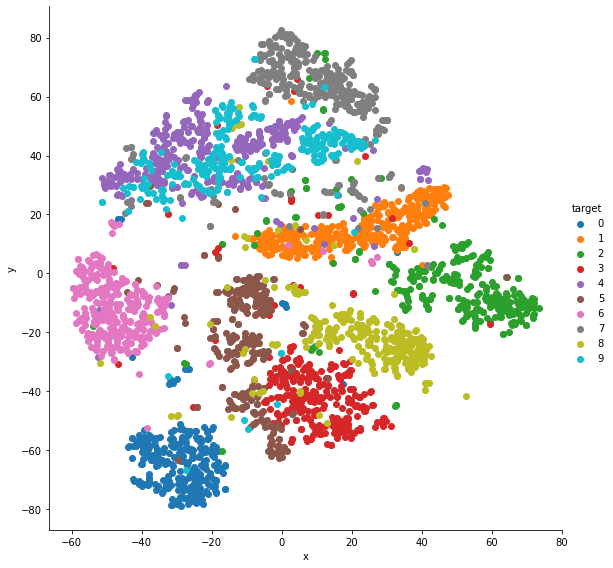

In [37]:
import seaborn as sns
grid = sns.FacetGrid(tsne_df, hue='target',size=8)
grid.map(plt.scatter,'x','y').add_legend()

/Users/shankarmanoharan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


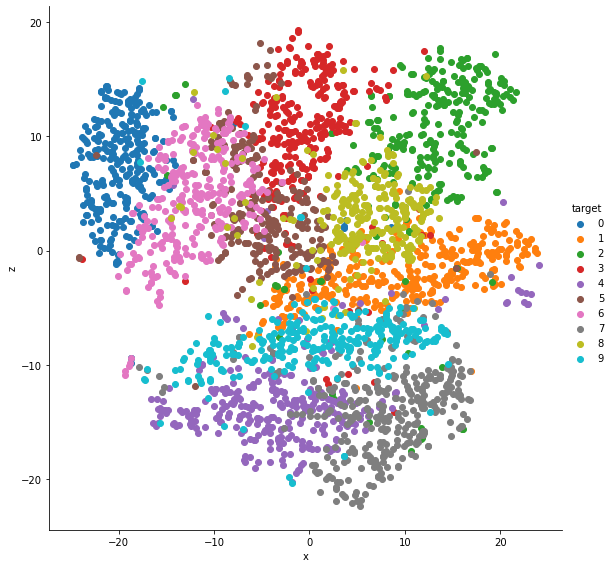

In [45]:
import seaborn as sns
grid1 = sns.FacetGrid(tsne_df, hue='target',size=8)
grid1.map(plt.scatter,'x','z').add_legend()

### End Chapter 1